<a href="https://colab.research.google.com/github/codingbjs/MachineLearning/blob/main/Regression_Analysis/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import seaborn as sns

DF = sns.load_dataset('mpg')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
DF.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


In [14]:
DF1 = DF[['mpg', 'cylinders', 'displacement', 'weight']].copy()
DF1.head(3)

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


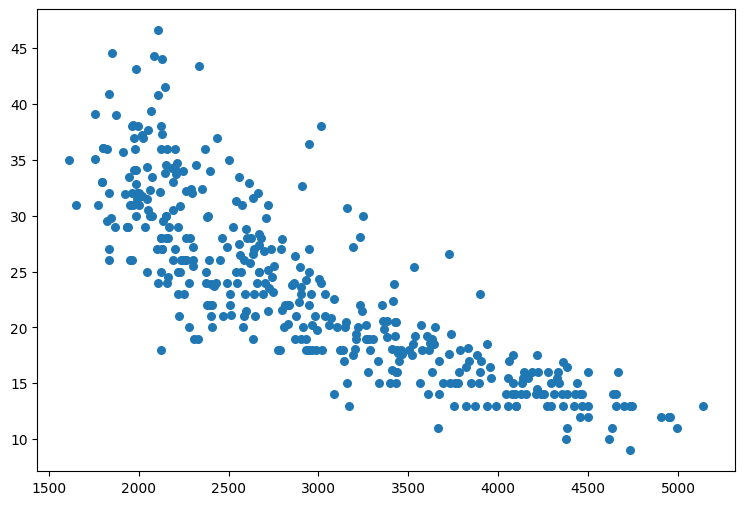

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9,6))
plt.scatter(x = DF1.weight, y = DF1.mpg, s = 30)
plt.show()

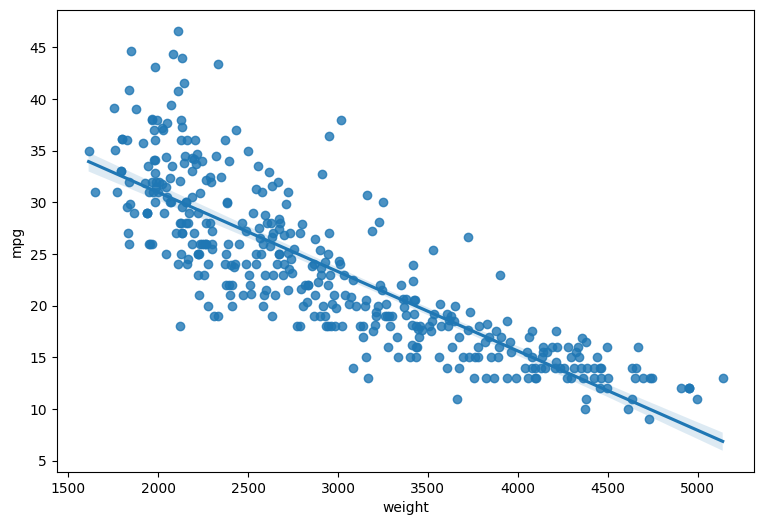

In [16]:
fig = plt.figure(figsize = (9,6))
sns.regplot(x='weight', y='mpg', data = DF1, fit_reg = True)
plt.show()

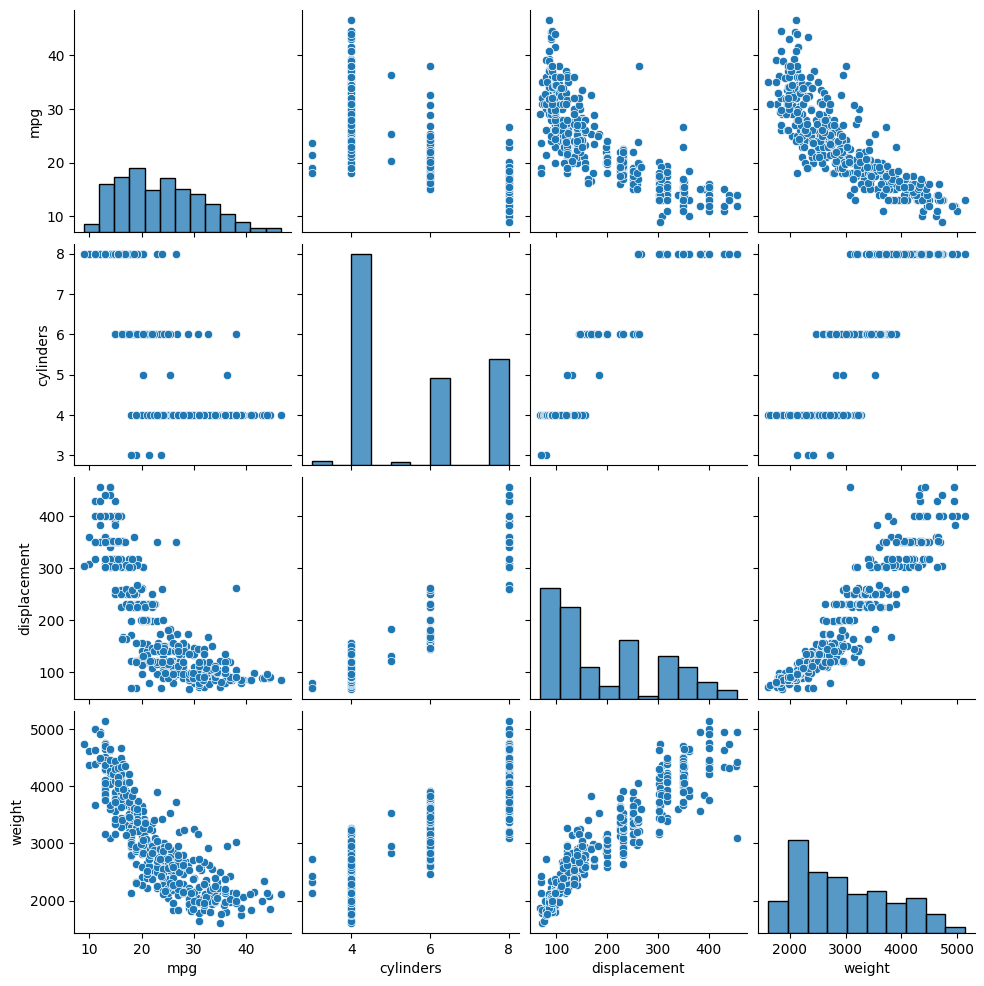

In [17]:
sns.pairplot(DF1)
plt.show()

In [18]:
from scipy import stats
stats.pearsonr(DF1.mpg, DF1.weight)[0]

-0.831740933244335

In [19]:
from scipy import stats
stats.pearsonr(DF1.mpg, DF1.displacement)[0]

-0.8042028248058978

In [20]:
from scipy import stats
stats.pearsonr(DF1.mpg, DF1.cylinders)[0]

-0.7753962854205542

In [21]:
from sklearn.model_selection import train_test_split

X = DF1[['weight']]
y = DF1['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (278, 1) (278,)
Test Data :  (120, 1) (120,)


In [22]:
from sklearn.linear_model import LinearRegression
RA = LinearRegression()
RA.fit(X_train, y_train)

LinearRegression()

In [23]:
print('weight(w) : ', RA.coef_)
print('bias(b) : ', RA.intercept_)

weight(w) :  [-0.00766168]
bias(b) :  46.28223639092363


In [24]:
RA.score(X_test, y_test)

0.7164499678296495

In [26]:
from sklearn.metrics import mean_squared_error

y_hat = RA.predict(X_test)
mean_squared_error(y_test, y_hat)

17.01518447782976

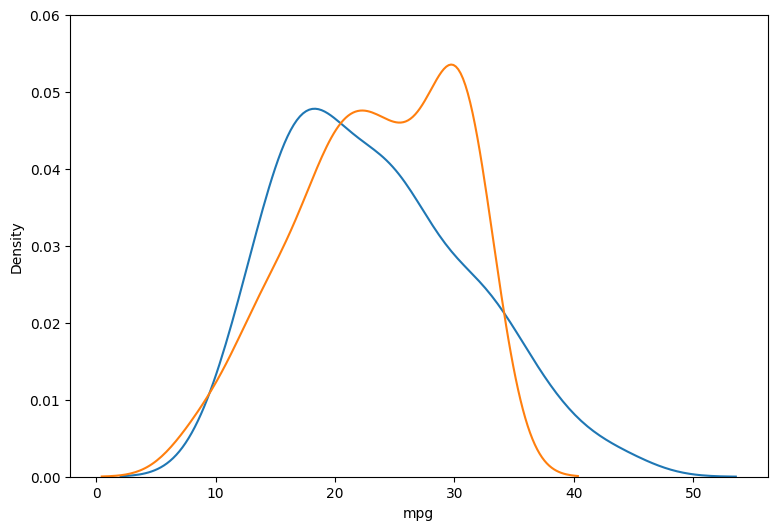

In [28]:
y_hat1 = RA.predict(X_test)

plt.figure(figsize=(9,6))
ax1 = sns.distplot(y_test, hist=False, label = 'y')
ax2 = sns.distplot(y_hat1, hist=False, label = 'y_hat', ax=ax1)
plt.ylim(0, 0.06)
plt.show()

In [29]:
DF2 = DF[['mpg', 'cylinders', 'displacement', 'weight']].copy()
DF2.head(3)

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


In [30]:
from sklearn.model_selection import train_test_split

X = DF2[['weight']]
y = DF2['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (278, 1) (278,)
Test Data :  (120, 1) (120,)


In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

print('변환 전 데이타 : ', X_train.shape)
print('2차항 변환 데이타 : ', X_train_poly.shape)

변환 전 데이타 :  (278, 1)
2차항 변환 데이타 :  (278, 2)


In [32]:
from sklearn.linear_model import LinearRegression
NL = LinearRegression()
NL.fit(X_train_poly, y_train)

LinearRegression()

In [33]:
import numpy as np
np.set_printoptions(suppress=True, precision=10)

print('weight(w) : ', NL.coef_)
print('bias(b) : ', NL.intercept_)

weight(w) :  [-0.0175042457  0.0000015338]
bias(b) :  60.88867526560669


In [34]:
X_test_poly = poly.fit_transform(X_test)
NL.score(X_test_poly, y_test)

0.7525521808321769

In [35]:
from sklearn.metrics import mean_squared_error

X_test_poly = poly.fit_transform(X_test)
mean_squared_error(y_test, NL.predict(X_test_poly))

14.848773810921921

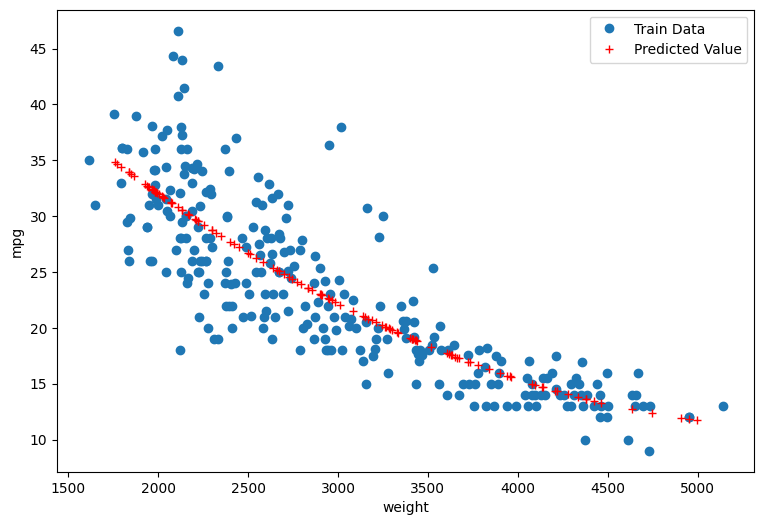

In [38]:
y_hat_test = NL.predict(X_test_poly)

plt.figure(figsize=(9,6))
plt.plot(X_train, y_train, 'o', label = 'Train Data')
plt.plot(X_test, y_hat_test, 'r+', label = 'Predicted Value')
plt.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

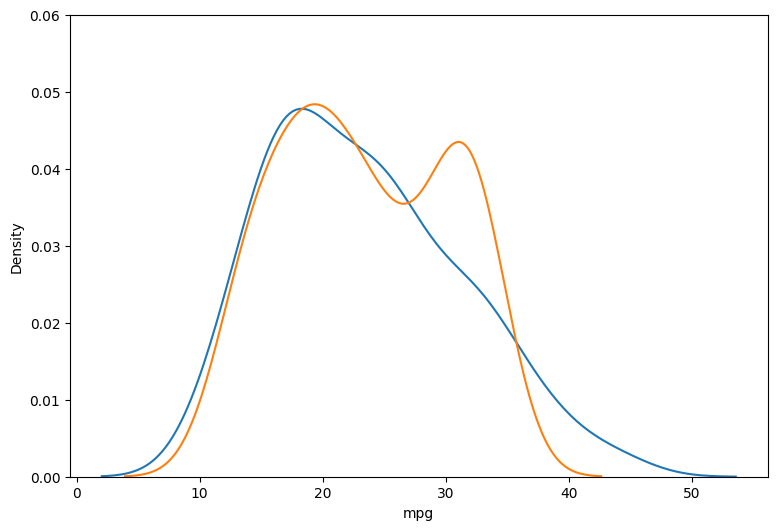

In [39]:
X_poly = poly.fit_transform(X_test)
y_hat2 = NL.predict(X_poly)

plt.figure(figsize=(9,6))
ax1 = sns.distplot(y_test, hist=False, label = 'y')
ax2 = sns.distplot(y_hat2, hist=False, label = 'y_hat', ax=ax1)
plt.ylim(0, 0.06)
plt.show()

In [40]:
DF3 = DF[['mpg', 'cylinders', 'displacement', 'weight']].copy()
DF3.head(3)

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


In [41]:
from sklearn.model_selection import train_test_split

X = DF3[['displacement', 'weight']]
y = DF3['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (278, 2) (278,)
Test Data :  (120, 2) (120,)


In [42]:
from sklearn.linear_model import LinearRegression
MR = LinearRegression()
MR.fit(X_train, y_train)

LinearRegression()

In [43]:
print('weight(w) : ', MR.coef_)
print('bias(b) : ', '%.8f' % MR.intercept_)

weight(w) :  [-0.0176653275 -0.0056727314]
bias(b) :  43.74652237


In [44]:
MR.score(X_test, y_test)

0.720971246285159

In [45]:
from sklearn.metrics import mean_squared_error


mean_squared_error(y_test, MR.predict(X_test))

16.743872969214195

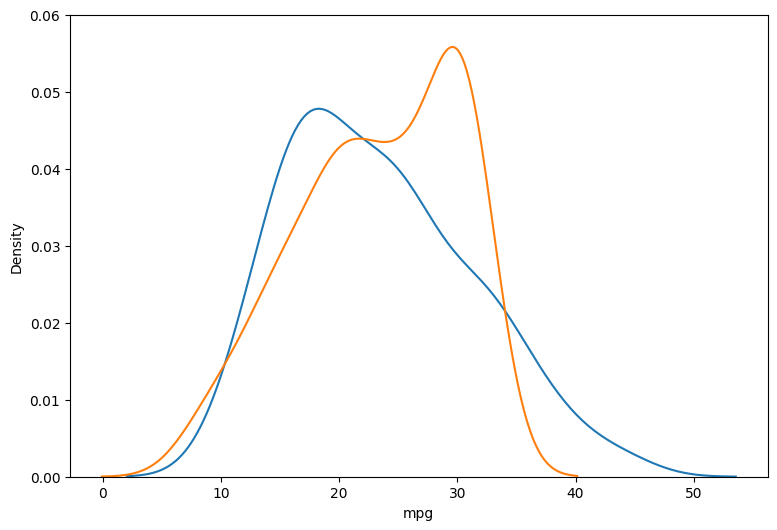

In [46]:
y_hat3 = MR.predict(X_test)

plt.figure(figsize=(9,6))
ax1 = sns.distplot(y_test, hist=False, label = 'y_test')
ax2 = sns.distplot(y_hat3, hist=False, label = 'y_hat', ax=ax1)
plt.ylim(0, 0.06)
plt.show()

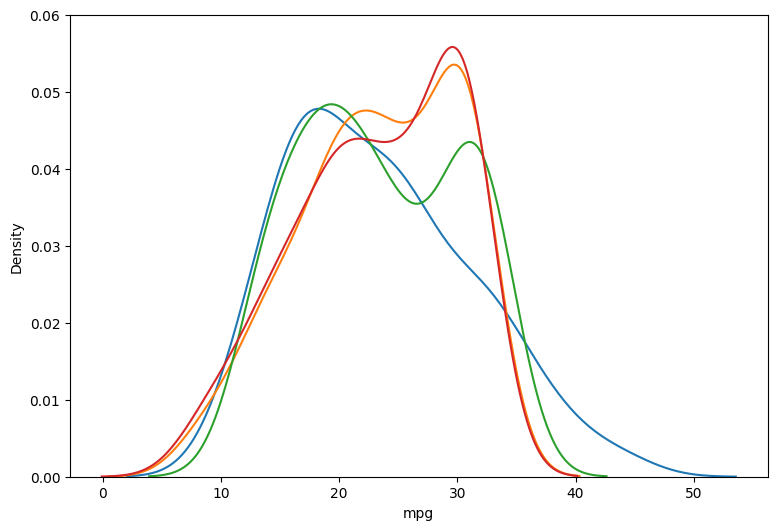

In [47]:
y_hat3 = MR.predict(X_test)

plt.figure(figsize=(9,6))
ax1 = sns.distplot(y_test, hist=False, label = 'y_test')
ax2 = sns.distplot(y_hat1, hist=False, label = 'y_hat', ax=ax1)
ax3 = sns.distplot(y_hat2, hist=False, label = 'y_hat', ax=ax1)
ax4 = sns.distplot(y_hat3, hist=False, label = 'y_hat', ax=ax1)
plt.ylim(0, 0.06)
plt.show()